In [1]:
%matplotlib inline
import pandas as pd
pd.options.display.max_colwidth = 1000
pd.options.display.max_colwidth

1000

In [2]:
import rbo
# https://towardsdatascience.com/rbo-v-s-kendall-tau-to-compare-ranked-lists-of-items-8776c5182899
#https://ragrawal.wordpress.com/2013/01/18/comparing-ranked-list/
#!pip3 install rbo
# 0 means disjoint and 1 means identical ranked lists
def compute_rbo_row(row):
    l1 = [l[0] for l in row['pred_bert_1760_1900']]
    l2 = [l[0] for l in row['pred_bert_contemporary']]
    return rbo.RankingSimilarity(l1, l2).rbo(p=.9)

In [3]:
!ls json_format

blb_artisan_clusters.json hmd_machine_clusters.json jsa_woman_clusters.json
blb_boy_clusters.json     hmd_slave_clusters.json   rsc_artisan_clusters.json
blb_machine_clusters.json hmd_woman_clusters.json   rsc_boy_clusters.json
blb_slave_clusters.json   jsa_artisan_clusters.json rsc_machine_clusters.json
blb_woman_clusters.json   jsa_boy_clusters.json     rsc_slave_clusters.json
hmd_artisan_clusters.json jsa_machine_clusters.json rsc_woman_clusters.json
hmd_boy_clusters.json     jsa_slave_clusters.json


In [19]:
corpus = 'hmd'
word1,word2 = 'machine','slave'#'slave'#'woman'# 'artisan'
df_1 = pd.read_json(f'json_format/{corpus}_{word1}_clusters.json')

In [20]:
df_1.loc[0,['pred_bert_1760_1900', 'pred_bert_contemporary']]

pred_bert_1760_1900         [[wheel, 0.19], [machine, 0.16], [tap, 0.11], [pump, 0.08], [engine, 0.07], [apparatus, 0.02], [process, 0.02], [machinery, 0.02], [hopper, 0.02], [mill, 0.01], [matt, 0.01], [arrangement, 0.01], [method, 0.01], [pipe, 0.01], [agent, 0.01], [current, 0.01], [principle, 0.01], [plant, 0.01], [gear, 0.01], [liquid, 0.0]]
pred_bert_contemporary    [[machine, 0.05], [invention, 0.04], [engine, 0.04], [instrument, 0.04], [method, 0.03], [vessel, 0.02], [kind, 0.02], [mill, 0.02], [process, 0.02], [type, 0.02], [design, 0.01], [work, 0.01], [device, 0.01], [system, 0.01], [canal, 0.01], [patent, 0.01], [apparatus, 0.01], [one, 0.01], [operation, 0.01], [craft, 0.01]]
Name: 0, dtype: object

In [21]:
df_1.columns

Index(['item_code', 'issue_code', 'publication_code', 'prevSentence',
       'currentSentence', 'markedSentence', 'maskedSentence', 'nextSentence',
       'targetExpression', 'article_path', 'item_id', 'issue_id',
       'publication_id', 'issue_date', 'item_type', 'word_count',
       'ocr_quality_mean', 'title', 'location', 'year', 'sentId', 'synt',
       'query_label', 'pred_bert_1760_1900', 'pred_bert_contemporary',
       'machine_1760_1900', 'boy_1760_1900', 'girl_1760_1900',
       'slave_1760_1900', 'artisan_1760_1900', 'woman_1760_1900',
       'machine_contemporary', 'boy_contemporary', 'girl_contemporary',
       'slave_contemporary', 'artisan_contemporary', 'woman_contemporary'],
      dtype='object')

In [22]:
df_2 = pd.read_json(f'json_format/{corpus}_{word2}_clusters.json')

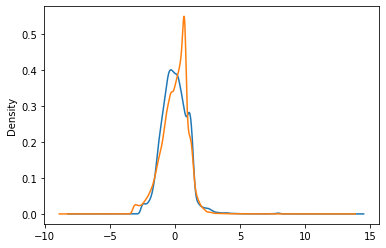

In [23]:
((df_1.woman_1760_1900 - df_1.woman_1760_1900.mean()) / df_1.woman_1760_1900.std()).plot(kind='density')
((df_2.machine_1760_1900 - df_2.machine_1760_1900.mean()) / df_2.machine_1760_1900.std()).plot(kind='density')

In [24]:
df_1.woman_1760_1900.mean(), df_2.machine_1760_1900.mean()

(0.19762420810674178, 0.16769739617287233)

In [25]:
df_1['rbo'] = df_1.apply(compute_rbo_row,axis=1)
df_2['rbo'] = df_2.apply(compute_rbo_row,axis=1)

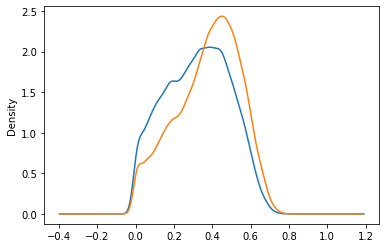

In [26]:
df_1['rbo'].plot(kind='density')
df_2['rbo'].plot(kind='density')

In [27]:
exec(f"print(df_1.rbo.corr(df_1.{word1}_contemporary - df_1.{word1}_1760_1900))")

0.14048235161145045


In [28]:
df_1.rbo.corr(df_1.machine_1760_1900),df_1.rbo.corr(df_1.machine_contemporary)

(0.3926369479153354, 0.5197303654479274)

In [29]:
df_1.rbo.corr(df_1.woman_1760_1900),df_1.rbo.corr(df_1.woman_contemporary)

(0.39500198823940086, 0.4699530370287537)

In [30]:
exec(f"print(df_2.rbo.corr(df_2.{word2}_contemporary - df_2.{word2}_1760_1900))")

0.1649316886815127


In [31]:
df_1.sort_values('rbo').iloc[0]

item_code                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [32]:
# get sentences for mask woman the changed considerably
df_2.sort_values('rbo').iloc[5]

item_code                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [35]:
# sentences where predictions change for mask
# and where the victorian model got it right
# _oppossed_ to a contemporary model
df_1[f'{word2}_diff'] =  df_1[f'{word2}_contemporary'] - df_1[f'{word2}_1760_1900'] 
df_1[df_2.rbo < 0.01 ].sort_values(f'{word2}_diff',
                                       ascending=True
                                    )[['currentSentence',
                                      'pred_bert_1760_1900',
                                      'pred_bert_contemporary']][:10]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,currentSentence,pred_bert_1760_1900,pred_bert_contemporary
28961,"Tha machine is. intended to print 46,000 sheets, or 23,000 perfect copies per hour, which is a greater number than has over yet been accomplished : and it also cats the paper into sheets, folds them, and records the number printed.","[[machine, 0.87], [roller, 0.06], [apparatus, 0.01], [machinery, 0.01], [paper, 0.0], [machines, 0.0], [process, 0.0], [##r, 0.0], [##v, 0.0], [press, 0.0], [instrument, 0.0], [##y, 0.0], [cylinder, 0.0], [##u, 0.0], [##c, 0.0], [system, 0.0], [engine, 0.0], [it, 0.0], [rack, 0.0], [frame, 0.0]]","[[##w, 0.14], [., 0.12], [-, 0.03], [##m, 0.03], [##les, 0.03], [', 0.02], [##l, 0.02], [##lia, 0.02], [##p, 0.02], [##ng, 0.02], [##le, 0.02], [##o, 0.01], [##wing, 0.01], [##k, 0.01], [##d, 0.01], [,, 0.01], [##ms, 0.01], [##me, 0.01], [##pa, 0.01], [##ck, 0.01]]"
29741,"The machine must have upset, as shortly afterwards the poor fellow W 9! found lying on the road quite insensible, with the handle of the machine jammed in his mouth.","[[machine, 0.96], [horse, 0.01], [carriage, 0.01], [engine, 0.0], [vehicle, 0.0], [gig, 0.0], [wheel, 0.0], [cart, 0.0], [machinery, 0.0], [fly, 0.0], [wagon, 0.0], [animal, 0.0], [machines, 0.0], [pony, 0.0], [wheels, 0.0], [boat, 0.0], [bicycle, 0.0], [thing, 0.0], [car, 0.0], [coach, 0.0]]","[[accident, 0.34], [ride, 0.06], [engine, 0.04], [crash, 0.04], [noise, 0.03], [trip, 0.02], [impact, 0.02], [collision, 0.02], [shock, 0.01], [driver, 0.01], [wind, 0.01], [action, 0.01], [weather, 0.01], [incident, 0.01], [car, 0.01], [explosion, 0.01], [injury, 0.01], [fall, 0.0], [horse, 0.0], [machine, 0.0]]"
26445,"Men are not machines, neither are they children whom we can hope to train to unreasoning obedience; and if the acts of the masters are founded in justice and reason, • ard only dictated by the exigencies of trade, it is not increased intelligence that will make them dispute them.","[[men, 0.55], [slaves, 0.07], [masters, 0.05], [fools, 0.05], [children, 0.03], [teachers, 0.03], [parents, 0.02], [women, 0.02], [ignorant, 0.01], [scholars, 0.01], [intelligent, 0.01], [taught, 0.01], [servants, 0.01], [wise, 0.0], [schools, 0.0], [instructed, 0.0], [boys, 0.0], [idiots, 0.0], [rulers, 0.0], [philosophers, 0.0]]","[[teachers, 0.11], [slaves, 0.07], [children, 0.07], [masters, 0.04], [men, 0.02], [adults, 0.02], [educated, 0.02], [learned, 0.02], [fools, 0.02], [free, 0.01], [equal, 0.01], [educators, 0.01], [animals, 0.01], [ignorant, 0.01], [intelligent, 0.01], [taught, 0.01], [boys, 0.01], [wise, 0.01], [women, 0.01], [servants, 0.01]]"
34592,""" Ing ana ttall in th a day, a potato ° getting machine ( an entirely thl,;""tina, ) was tried in a field near Sankey Bridge, tatars. ? nesse was witnessed by a large body of specghly ° Perations were pronounced quite successful 13ell 'ast latisfactory.","[[,, 0.65], [potato, 0.09], [machine, 0.04], [experiment, 0.03], [crop, 0.03], [process, 0.01], [operation, 0.01], [;, 0.01], [trial, 0.0], [plant, 0.0], ["", 0.0], [success, 0.0], [., 0.0], [one, 0.0], [disease, 0.0], [potatoes, 0.0], [experiments, 0.0], [failure, 0.0], [industry, 0.0], [vegetable, 0.0]]","[[cold, 0.03], [good, 0.03], [better, 0.02], [sick, 0.01], [worse, 0.01], [old, 0.01], [infected, 0.01], [ripe, 0.01], [eaten, 0.01], [small, 0.01], [green, 0.01], [wet, 0.01], [lost, 0.01], [out, 0.01], [bad, 0.01], [round, 0.01], [in, 0.01], [there, 0.01], [burnt, 0.01], [hot, 0.01]]"
32347,"Almost immediately, however, Conductor Smug Wood arrived with the Royal Society 's fire escape, end having pitched his machine tn front of the building, he courageously ascended it and brought down in rafety the Rye Persons whose lives were so much jeoardised. pun rraehtag the ground the conductor was voctfereuely cheered.","[[tent, 0.8300000000000001], [tents, 0.05], [camp, 0.02], [flag, 0.01], [balloon, 0.0], [quarters, 0.0], [position, 0.0], [car, 0.0], [station, 0.0], [platform, 0.0], [apparatus, 0.0], [lot, 0.0]

In [34]:
# sentences where predictions change for mask
# and where the victorian model got it right
# _oppossed_ to a contemporary model
df_2[f'{word2}_diff'] =  df_2[f'{word2}_contemporary'] - df_2[f'{word2}_1760_1900'] 
df_2[df_2.rbo < 0.01 ].sort_values(f'{word2}_diff',
                                       ascending=True
                                    )[['currentSentence',
                                      'pred_bert_1760_1900',
                                      'pred_bert_contemporary']][:10]

,currentSentence,pred_bert_1760_1900,pred_bert_contemporary
44965,"It should Lao be noted that there was in negotiation a treaty for the purchase of the Carinas, which had long been the seat of the horrors of tho slave trade, and also for the establishment of commercial relations with Dahomey. sr, ' alio recant purchase of the Danish forts would greatly ' contribute to diminish the slave trade.","[[slave, 0.99], [african, 0.0], [pirate, 0.0], [negro, 0.0], [guinea, 0.0], [opium, 0.0], [free, 0.0], [black, 0.0], [slaves, 0.0], [maroon, 0.0], [ivory, 0.0], [danish, 0.0], [slavery, 0.0], [fur, 0.0], [white, 0.0], [gold, 0.0], [indian, 0.0], [coffee, 0.0], [piracy, 0.0], [illicit, 0.0]]","[[##n, 0.45], [##non, 0.08], [##s, 0.07], [##la, 0.03], [##los, 0.02], [##nde, 0.01], [##ir, 0.01], [##no, 0.01], [##ne, 0.01], [##en, 0.01], [##on, 0.01], [##be, 0.01], [##le, 0.01], [##lo, 0.01], [##nn, 0.01], [river, 0.0], [##th, 0.0], [##lon, 0.0], [-, 0.0], [##ly, 0.0]]"
33904,"A public meeting will take place at Exeter hall on Monday, the Ist of June, to take into consideration certain plans for the extinction of die slave trade and the civilization of Africa.","[[slave, 0.99], [free, 0.0], [african, 0.0], [ivory, 0.0], [cape, 0.0], [fur, 0.0], [transit, 0.0], [british, 0.0], [indian, 0.0], [colonial, 0.0], [black, 0.0], [gold, 0.0], [negro, 0.0], [foreign, 0.0], [##fr, 0.0], [niger, 0.0], [congo, 0.0], [english, 0.0], [cotton, 0.0], [coal, 0.0]]","[[##ppe, 0.48], [##m, 0.18], [##n, 0.08], [##u, 0.08], [hard, 0.03], [##p, 0.02], [##ne, 0.02], [##mate, 0.01], [##r, 0.01], [##men, 0.01], [##pe, 0.01], [##ner, 0.0], [##hard, 0.0], [##mat, 0.0], [of, 0.0], [-, 0.0], [,, 0.0], [##f, 0.0], [##ns, 0.0], [##ur, 0.0]]"
14155,"Mr. BAILLIE, in e speech descriptive of the horrors of die slave trade, as carried on in defiance of the efforts of the squadron appointed for that service to prevent it, imsved an address to the crown, praying her majesty to give directions that negotiations be entered into with foreign powers to relieve this country from the engagement under which it labours, of - maintaining a squadron on the coast of Africa.","[[slave, 0.98], [african, 0.01], [guinea, 0.0], [free, 0.0], [ivory, 0.0], [black, 0.0], [negro, 0.0], [cape, 0.0], [slaves, 0.0], [senegal, 0.0], [illicit, 0.0], [carrying, 0.0], [coast, 0.0], [niger, 0.0], [said, 0.0], [fur, 0.0], [mediterranean, 0.0], [-, 0.0], [egyptian, 0.0], [indian, 0.0]]","[[##ppe, 0.93], [##mate, 0.02], [hard, 0.01], [##m, 0.01], [##p, 0.0], [##u, 0.0], [##n, 0.0], [##pe, 0.0], [##fen, 0.0], [##mer, 0.0], [##men, 0.0], [##ring, 0.0], [##ble, 0.0], [##use, 0.0], [-, 0.0], [of, 0.0], [##ne, 0.0], [##me, 0.0], [##ging, 0.0], [##per, 0.0]]"
29390,"By letters from the above squadron to the 19th ult. we are informed. that Counnod! re Bice has entered into treaty with every native chief in the Bight of Benin for the abolition of th 4 slave trade, protection of missionaries, & c.","[[slave, 0.99], [free, 0.0], [ivory, 0.0], [salt, 0.0], [negro, 0.0], [export, 0.0], [transit, 0.0], [foreign, 0.0], [slaves, 0.0], [black, 0.0], [opium, 0.0], [carrying, 0.0], [african, 0.0], [fur, 0.0], [exclusive, 0.0], [illicit, 0.0], [guinea, 0.0], [inland, 0.0], [lagos, 0.0], [cotton, 0.0]]","[[., 0.07], [##d, 0.05], [##de, 0.05], [##t, 0.04], [##n, 0.04], [##s, 0.02], [##b, 0.02], [%, 0.02], [##°, 0.02], [##g, 0.02], [-, 0.02], [##e, 0.02], [##h, 0.02], [##c, 0.01], [##th, 0.01], [##k, 0.01], [##r, 0.01], [##a, 0.01], [,, 0.01], [##f, 0.01]]"
42848,MANUMISSION OF ♦ SLAVE.—This morning the novel and interesting circumstance of emancipating a slave took place before the Lord Mayor.,"[[slave, 0.74], [slaves, 0.2], [negro, 0.01], [child, 0.0], [##s, 0.0], [property, 0.0], [prisoner, 0.0], [servant, 0.0], [prisoners, 0.0], [woman, 0.0], [captive, 0.0], [person, 0.0], [captives, 0.0], [man, 0.0], [freedom, 0.0], [body, 0.0], [master, 0.0], [slavery, 0.0], [victim, 0.0], [goods, 0.0]]","[[##a, 0.03], [##2, 0.02], [house, 0

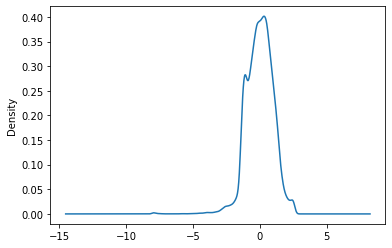

In [361]:
df_1[f'{word2}_z_1760_1900'].plot(kind='density')

In [379]:
# sentences where predictions change for mask machine
# and where the victorian model predicted woman
# _oppossed_ to a contemporary model 
df_1[f'{word2}_diff'] =  df_1[f'{word2}_contemporary'] - df_1[f'{word2}_1760_1900'] 
df_1[f'{word2}_z_1760_1900'] = (df_1[f'{word2}_1760_1900'] - df_1[f'{word2}_1760_1900'].mean()) /  df_1[f'{word2}_1760_1900'].std() 
df_1[(df_1.rbo < 0.01) & (df_1[f'{word2}_z_1760_1900'] > 2.0)].sort_values(f'{word2}_diff',
                                       ascending=True
                                    )[['currentSentence',
                                      'pred_bert_1760_1900',
                                      'pred_bert_contemporary']]

,currentSentence,pred_bert_1760_1900,pred_bert_contemporary
11886,"His political creed, of which he sent the Citizen King a copy, was not approved of; we believe, because politi Cal machines are most useful when they profess no creed, and know no principle.","[[men, 0.48], [philosophers, 0.13], [##ists, 0.03], [persons, 0.03], [ministers, 0.02], [people, 0.02], [politicians, 0.02], [writers, 0.02], [gentlemen, 0.01], [characters, 0.01], [princes, 0.01], [teachers, 0.01], [##s, 0.01], [subjects, 0.01], [opinions, 0.01], [bodies, 0.01], [fools, 0.01], [principles, 0.0], [governments, 0.0], [rulers, 0.0]]","[[##i, 0.17], [##ci, 0.14], [##vi, 0.07], [##ii, 0.03], [##is, 0.03], [##cula, 0.03], [##ici, 0.02], [##oris, 0.02], [##di, 0.02], [##um, 0.01], [##isi, 0.01], [##cio, 0.01], [##io, 0.01], [##va, 0.01], [##ium, 0.01], [##dus, 0.01], [##itas, 0.01], [##via, 0.01], [##iti, 0.01], [##dini, 0.01]]"
10808,"By the bye, I want a snow storm for Monday, and amour machine is out of order, pray send ute your 's. ""","[[it, 0.46], [she, 0.22], [that, 0.1], [this, 0.06], [i, 0.03], [monday, 0.02], [he, 0.01], [all, 0.01], [everything, 0.01], [weather, 0.01], [business, 0.0], [t, 0.0], [sunday, 0.0], [tuesday, 0.0], [you, 0.0], [there, 0.0], [mine, 0.0], [1, 0.0], [day, 0.0], [which, 0.0]]","[[##na, 0.23], [##ne, 0.11], [##e, 0.1], [##a, 0.09], [##n, 0.06], [##eux, 0.04], [##s, 0.02], [##o, 0.02], [##net, 0.01], [##nie, 0.01], [,, 0.01], [', 0.01], [##y, 0.01], [##t, 0.01], [##ous, 0.01], [##ia, 0.01], [##ee, 0.0], [##ie, 0.0], [##i, 0.0], [##ette, 0.0]]"
8699,The judges awarded tile first prize te Hell 's machine and the PS4`011 ( 1 t AI M`Connick 's.,"[[,, 0.88], [., 0.06], [;, 0.04], [:, 0.0], [-, 0.0], [(, 0.0], [j, 0.0], ["", 0.0], [##j, 0.0], [), 0.0], [##1, 0.0], [s, 0.0], [!, 0.0], [1, 0.0], [ps, 0.0], [2, 0.0], [##3, 0.0], [##2, 0.0], [t, 0.0], [i, 0.0]]","[[gate, 0.13], [kitchen, 0.04], [angels, 0.02], [end, 0.02], [own, 0.01], [way, 0.01], [bar, 0.01], [gates, 0.01], [nest, 0.01], [inn, 0.01], [cross, 0.01], [egg, 0.01], [harvest, 0.01], [sake, 0.0], [wall, 0.0], [fury, 0.0], [head, 0.0], [garden, 0.0], [wood, 0.0], [delight, 0.0]]"
16846,"If these machines are tow make silk nets, to supersede Spanish made point net, the speculation will be a complete failure, as bobbin net is utterly unfit to be ornamented in the same manner that point net has been so long done in Spain.","[[gentlemen, 0.23], [people, 0.17], [persons, 0.15], [men, 0.14], [foreigners, 0.04], [individuals, 0.03], [english, 0.03], [ladies, 0.02], [americans, 0.01], [fishermen, 0.01], [two, 0.01], [manufacturers, 0.01], [italians, 0.01], [merchants, 0.0], [agents, 0.0], [##men, 0.0], [vessels, 0.0], [french, 0.0], [countries, 0.0], [artists, 0.0]]","[[nets, 0.33], [vessels, 0.05], [pieces, 0.04], [boats, 0.04], [ships, 0.03], [lines, 0.02], [ones, 0.02], [sails, 0.02], [stones, 0.01], [things, 0.01], [designs, 0.01], [net, 0.01], [circles, 0.01], [machines, 0.01], [objects, 0.01], [two, 0.01], [baskets, 0.01], [items, 0.01], [knots, 0.01], [pearls, 0.01]]"
22579,The paying out machines worked with the most • perfect ease and iegulerity.,"[[was, 0.87], [were, 0.03], [being, 0.01], [is, 0.01], [,, 0.01], [then, 0.01], [now, 0.0], [again, 0.0], [they, 0.0], [also, 0.0], [and, 0.0], [men, 0.0], [., 0.0], [##men, 0.0], [all, 0.0], [he, 0.0], [be, 0.0], [machinery, 0.0], [!, 0.0], [-, 0.0]]","[[mechanism, 0.1], [method, 0.05], [system, 0.05], [operation, 0.04], [process, 0.04], [procedure, 0.03], [technique, 0.03], [arrangement, 0.01], [cable, 0.01], [cables, 0.01], [procedures, 0.01], [operations, 0.01], [mechanisms, 0.01], [harness, 0.01], [machine, 0.01], [action, 0.01], [systems, 0.01], [line, 0.01], [maneuver, 0.01], [scheme, 0.01]]"
10497,"Gentlemen, the extent of the vast empire over which the East India Company more immediately presides, is as fearful as it is extraordinary, and it is a disproof of the common adage, that little wisdom is required for governing man

In [365]:
year = 'year'
if corpus == 'blb':
    year = 'date'

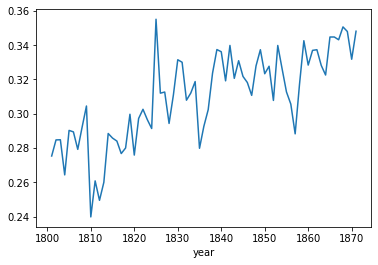

In [348]:
df_1_mean = df_1.groupby(year)['rbo'].mean().plot()

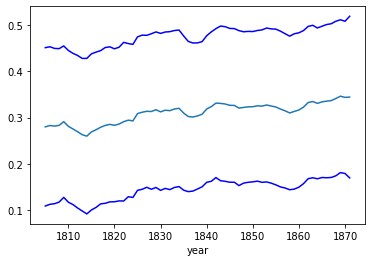

In [349]:
df_1_mean = df_1.groupby(year)['rbo'].mean().rolling(5).mean()
df_1_std = df_1.groupby(year)['rbo'].std().rolling(5).mean()
df_1_mean.plot()
(df_1_mean - df_1_std).plot(color='blue')
(df_1_mean + df_1_std).plot(color='blue')


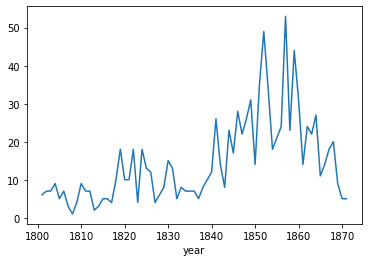

In [21]:
df_1[df_1.rbo <= 0.02].groupby(year).item_code.count().plot()

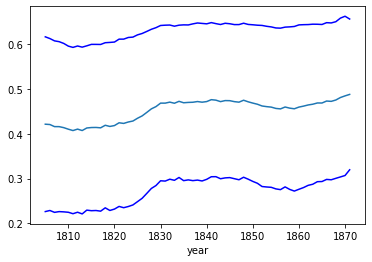

In [22]:
df_2_mean = df_2.groupby(year)['rbo'].mean().rolling(5).mean()
df_2_std = df_2.groupby(year)['rbo'].std().rolling(5).mean()
df_2_mean.plot()
(df_2_mean - df_2_std).plot(color='blue')
(df_2_mean + df_2_std).plot(color='blue')

# Compare predictions

In [289]:
corpus = 'hmd'
word1 = 'machine'#'slave'#'woman'# 'artisan'
df_1 = pd.read_json(f'json_format/{corpus}_{word1}_clusters.json')

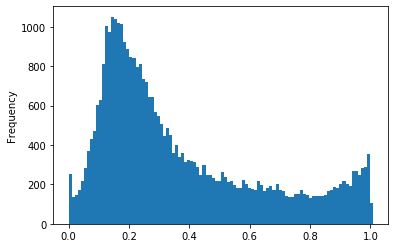

In [290]:
df_1.machine_1760_1900.plot(kind='hist',bins=100)

In [291]:
#df_1 = df_1[df_1.machine_1760_1900 > .15]
#df_1.reset_index(inplace=True)

In [292]:
from collections import Counter

wf_old = Counter([w[0] for l in df_1.pred_bert_1760_1900 for w in l])
wf_new = Counter([w[0] for l in df_1.pred_bert_contemporary for w in l])

In [293]:
wf_new['technology']

1672

In [294]:
all_words = set(list(wf_old.keys()) + list(wf_new.keys()))

In [295]:
total_old = sum(wf_old.values())
total_new = sum(wf_new.values())

In [296]:
total_old,wf_old['machine'],total_new,wf_new['machine']

(713480, 19346, 713480, 15001)

In [297]:
wf_old = {w: (wf_old.get(w,0) / total_old) + 0.00001 for w in all_words}
wf_new = {w: (wf_new.get(w,0) / total_new) + 0.00001 for w in all_words}
wf_old['machine'],wf_new['machine']

(0.02712498570387397, 0.02103511633122162)

In [298]:
wf_new['technology']

0.0023534434041598924

In [299]:
odds_old = {w: wf_old[w] / (1.0 - wf_old[w]) for w in all_words}
odds_new = {w: (wf_new[w] / (1.0 - wf_new[w])) for w in all_words}

In [300]:
log_odd = {w:log(odds_old[w] / odds_new[w]) for w in all_words}

In [310]:
print('\n'.join([','.join([i[0],str(round(i[1],2))]) for i in sorted(log_odd.items(),key=lambda x:x[1],reverse=True)[:10]]))

jenny,3.97
harrow,3.45
gig,3.17
shuttle,2.92
bonnet,2.86
modes,2.81
trough,2.62
establishments,2.54
appliances,2.54
bam,2.51


## Machine Across Corpora

In [34]:
from collections import Counter, defaultdict
from scipy.stats import entropy

In [43]:
corpus1,corpus2 = 'rsc','blb'
word = 'machine' 
df_1 = pd.read_json(f'json_format/{corpus1}_{word}_clusters.json')
df_2 = pd.read_json(f'json_format/{corpus2}_{word}_clusters.json')

In [44]:
wf_1 = Counter([w[0] for l in df_1.pred_bert_1760_1900 for w in l])
wf_2 = Counter([w[0] for l in df_2.pred_bert_1760_1900 for w in l])

In [45]:
all_words = set(wf_1.keys()).union(set(wf_2.keys()))

In [46]:
for w in all_words:
    wf_1[w]+=.1
    wf_2[w]+=.1

In [47]:
totals_1 = sum(wf_1.values())
totals_2 = sum(wf_2.values())

In [48]:
prob_1,prob_2 = defaultdict(float),defaultdict(float)
for w in all_words:
    prob_1[w] = wf_1[w]/totals_1
    prob_2[w] = wf_2[w]/totals_2

In [49]:
len(prob_1),len(prob_2)

(13286, 13286)

In [50]:
entropy(list(prob_1.values())),entropy(list(prob_2.values()))

(6.564905916549041, 7.04586951493667)

In [51]:
entropy([.333,.333,.333])

1.0986122886681096

In [56]:
entropy([.49,.51])

0.6929471672244782

In [53]:
entropy([0.0001,0.0001,.9999])

0.002041863887673169

## Entropy over Time

In [112]:
corpus = 'hmd'
word = 'machine' 
df = pd.read_json(f'json_format/{corpus}_{word}_clusters.json')

In [113]:
df.columns

Index(['item_code', 'issue_code', 'publication_code', 'prevSentence',
       'currentSentence', 'markedSentence', 'maskedSentence', 'nextSentence',
       'targetExpression', 'article_path', 'item_id', 'issue_id',
       'publication_id', 'issue_date', 'item_type', 'word_count',
       'ocr_quality_mean', 'title', 'location', 'year', 'sentId', 'synt',
       'query_label', 'pred_bert_1760_1900', 'pred_bert_contemporary',
       'machine_1760_1900', 'boy_1760_1900', 'girl_1760_1900',
       'slave_1760_1900', 'artisan_1760_1900', 'woman_1760_1900',
       'machine_contemporary', 'boy_contemporary', 'girl_contemporary',
       'slave_contemporary', 'artisan_contemporary', 'woman_contemporary'],
      dtype='object')

In [114]:
begin,cutoff,end = 1800,1850,1900

In [116]:
df_old = df[(df.year < cutoff) & (df.year >= begin) ]

In [117]:
df_new = df[(df.year >= cutoff) & (df.year < end) ]

In [118]:
df_old.shape,df_new.shape

((16377, 37), (19297, 37))

In [119]:
wf_1 =Counter(dict(Counter([w[0] for l in df_old.pred_bert_1760_1900 for w in l]).most_common(1000)))
wf_2 = Counter(dict(Counter([w[0] for l in df_new.pred_bert_1760_1900 for w in l]).most_common(1000)))

In [120]:
wf_1

Counter({'machine': 8581,
         'machinery': 5961,
         'machines': 4582,
         'apparatus': 4518,
         'engine': 4450,
         'system': 3057,
         'work': 2820,
         'instrument': 2785,
         'mill': 2747,
         ',': 2643,
         'wheel': 2353,
         'power': 2287,
         'process': 2209,
         'house': 2097,
         '.': 2023,
         'engines': 1990,
         'vessel': 1975,
         'works': 1792,
         '-': 1521,
         'establishment': 1516,
         'plan': 1470,
         'one': 1459,
         'mills': 1407,
         '##s': 1383,
         'carriage': 1265,
         'instruments': 1263,
         'method': 1252,
         'press': 1190,
         'body': 1175,
         'boat': 1153,
         'tools': 1146,
         'plant': 1135,
         'invention': 1113,
         'man': 1103,
         'paper': 1103,
         'men': 1102,
         'mechanism': 1101,
         'horse': 1060,
         'water': 1036,
         'box': 1000,
         'iron':

In [121]:
all_words = set(wf_1.keys()).union(set(wf_2.keys()))

In [122]:
for w in all_words:
    wf_1[w]+=.1
    wf_2[w]+=.1

In [123]:
totals_1 = sum(wf_1.values())
totals_2 = sum(wf_2.values())

In [124]:
prob_1,prob_2 = defaultdict(float),defaultdict(float)
for w in all_words:
    prob_1[w] = wf_1[w]/totals_1
    prob_2[w] = wf_2[w]/totals_2

In [125]:
entropy(list(prob_1.values())),entropy(list(prob_2.values()))

(6.194335394353352, 6.112133989386541)

## Rank differences for a specific words

In [37]:
df_1.columns

Index(['item_code', 'issue_code', 'publication_code', 'prevSentence',
       'currentSentence', 'markedSentence', 'maskedSentence', 'nextSentence',
       'targetExpression', 'article_path', 'item_id', 'issue_id',
       'publication_id', 'issue_date', 'item_type', 'word_count',
       'ocr_quality_mean', 'title', 'location', 'year', 'sentId', 'synt',
       'query_label', 'pred_bert_1760_1900', 'pred_bert_contemporary',
       'machine_1760_1900', 'boy_1760_1900', 'girl_1760_1900',
       'slave_1760_1900', 'artisan_1760_1900', 'woman_1760_1900',
       'machine_contemporary', 'boy_contemporary', 'girl_contemporary',
       'slave_contemporary', 'artisan_contemporary', 'woman_contemporary',
       'rbo', 'slave_diff'],
      dtype='object')

1

In [48]:
def get_position(x, target_word): 
    try: 
        return 1/ ([w for w,v in x].index(target_word) + 1)
    except ValueError:
        return 1 / (len(x) + 1)


In [49]:
target_word = 'slave'
df_1[f'{target_word}_old'] = df_1.pred_bert_1760_1900.apply(get_position, target_word=target_word)
df_1[f'{target_word}_new'] = df_1.pred_bert_contemporary.apply(get_position, target_word=target_word)

In [50]:
df_1[f'{target_word}_rank_diff'] = df_1[f'{target_word}_old'] - df_1[f'{target_word}_new']

In [60]:
df_1.sort_values(f'{target_word}_rank_diff',ascending=False)[['currentSentence','pred_bert_1760_1900','pred_bert_contemporary',f'{target_word}_rank_diff']][:20]

,currentSentence,pred_bert_1760_1900,pred_bert_contemporary,slave_rank_diff
9817,"His plan was condemned upon the ground, that it tended ' to render man too much of a machine.","[[slave, 0.1], [savage, 0.1], [tyrant, 0.08], [man, 0.06], [fool, 0.05], [gentleman, 0.05], [brute, 0.04], [farmer, 0.03], [christian, 0.03], [coward, 0.03], [reformer, 0.02], [master, 0.02], [soldier, 0.02], [philanthropist, 0.01], [child, 0.01], [hero, 0.01], [necessity, 0.01], [burden, 0.01], [stranger, 0.01], [citizen, 0.01]]","[[man, 0.11], [hero, 0.07], [victim, 0.06], [friend, 0.03], [coward, 0.03], [target, 0.03], [burden, 0.02], [character, 0.02], [threat, 0.02], [person, 0.02], [soldier, 0.02], [prisoner, 0.02], [fool, 0.02], [leader, 0.01], [host, 0.01], [martyr, 0.01], [nation, 0.01], [foe, 0.01], [servant, 0.01], [disadvantage, 0.01]]",0.952381
1069,"Having excluded all moral liberty from his system, and reduced man to a mere "" living machine, "" ( Essays, p. 28. ) he kindly points out the error on which society has hitherto been based.","[[slave, 0.1], [machine, 0.08], [animal, 0.07], [creature, 0.05], [being, 0.03], [thing, 0.03], [man, 0.03], [brute, 0.03], [stock, 0.02], [savage, 0.02], [stone, 0.02], [mass, 0.02], [statue, 0.02], [god, 0.02], [skeleton, 0.02], [worm, 0.01], [principle, 0.01], [log, 0.01], [plant, 0.01], [beast, 0.01]]","[[thing, 0.29], [being, 0.2], [creature, 0.05], [machine, 0.02], [man, 0.02], [organism, 0.02], [god, 0.02], [animal, 0.01], [form, 0.01], [person, 0.01], [object, 0.01], [corpse, 0.01], [ape, 0.01], [stone, 0.01], [hell, 0.01], [matter, 0.01], [tree, 0.0], [statue, 0.0], [figure, 0.0], [spirit, 0.0]]",0.952381
26405,"The act of receiving a bribe is of itself des grading, and when it is : compulsion that is employed instead of bribery, a bitter and angry feeling is created in the mind of the tenant or the tradesman who is made to feel himself a machine in the hands of his master, and not permitted to have a mind of his own.","[[slave, 0.36], [tool, 0.25], [prisoner, 0.11], [servant, 0.05], [puppet, 0.04], [captive, 0.03], [dependent, 0.02], [man, 0.01], [vassal, 0.01], [stranger, 0.01], [creature, 0.01], [subordinate, 0.01], [child, 0.0], [prey, 0.0], [subject, 0.0], [victim, 0.0], [cipher, 0.0], [burden, 0.0], [person, 0.0], [master, 0.0]]","[[puppet, 0.11], [prisoner, 0.1], [burden, 0.08], [victim, 0.06], [slave, 0.06], [servant, 0.04], [stranger, 0.04], [threat, 0.02], [danger, 0.02], [fool, 0.02], [pawn, 0.02], [subject, 0.01], [hostage, 0.01], [power, 0.01], [captive, 0.01], [tyrant, 0.01], [part, 0.01], [man, 0.01], [liability, 0.01], [monopoly, 0.01]]",0.800000
9791,"He has been a machine merely in the hands of the richer classes. , Now that such should, produce an indifference to perform labour in a suitable manner, is easy to be i►nagined in such a state of society, as it regards const►tutional freedom, and where all rights are acknowledged as our own.","[[slave, 0.2], [tool, 0.13], [servant, 0.07], [person, 0.04], [labour, 0.04], [machine, 0.03], [puppet, 0.02], [man, 0.02], [mechanic, 0.02], [prisoner, 0.02], [subject, 0.02], [stranger, 0.01], [creature, 0.01], [instrument, 0.01], [child, 0.01], [thing, 0.01], [burden, 0.01], [master, 0.01], [farmer, 0.01], [work, 0.01]]","[[servant, 0.07], [slave, 0.05], [victim, 0.04], [man, 0.03], [burden, 0.02], [result, 0.02], [labour, 0.02], [work, 0.02], [commodity, 0.02], [job, 0.02], [being, 0.01], [tool, 0.01], [subject, 0.01], [prisoner, 0.01], [worker, 0.01], [factor, 0.01], [freeman, 0.01], [problem, 0.01], [product, 0.01], [profit, 0.01]]",0.500000
33738,"The modern soldier most no longer remain a passive machine, but must be trained as a skilled labourer.","[[soldier, 0.35000000000000003], [slave, 0.09], [spectator, 0.06], [mechanic, 0.05], [servant, 0.03], [passive, 0.03], [volunteer, 0.03], [subject, 0.02], [man, 0.02], [animal, 0.02], [tool, 0.02], [citizen, 0.01], [instrument, 0.01], [creature, 0.01], [warrior, 0.01], [brute, 0.01], [sava

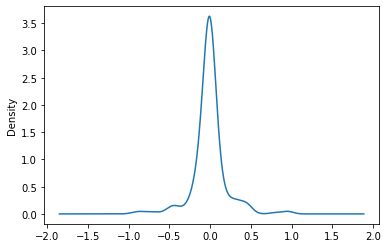

In [58]:
df_1[df_1[f'{target_word}_rank_diff'] != 0][f'{target_word}_rank_diff'].plot(kind='density')

In [59]:
df_1[df_1[f'{target_word}_rank_diff'] != 0][f'{target_word}_rank_diff'].mean()

-0.0061278555284638315

In [63]:
df_1[df_1[f'{target_word}_rank_diff'] > 0].to_excel('machine_target_slave_rankdiff.xlsx')

In [ ]:
# discourse of slavery removed from machines

In [65]:
target_word = 'men'
df_1[f'{target_word}_old'] = df_1.pred_bert_1760_1900.apply(get_position, target_word=target_word)
df_1[f'{target_word}_new'] = df_1.pred_bert_contemporary.apply(get_position, target_word=target_word)
df_1[f'{target_word}_rank_diff'] = df_1[f'{target_word}_old'] - df_1[f'{target_word}_new']
df_1.sort_values(f'{target_word}_rank_diff',ascending=False)[['currentSentence','pred_bert_1760_1900','pred_bert_contemporary',f'{target_word}_rank_diff']][:20]

,currentSentence,pred_bert_1760_1900,pred_bert_contemporary,men_rank_diff
8974,"It contains twentythree machines, which performs sixteen distinet operations on the stock, and are similar in principle and construction to those in use in the two Government armoury establishments in the United States, at Springfield, Massachusetts, and Harper 's ferry, Virginia.","[[men, 0.07], [hands, 0.06], [apparatus, 0.04], [machines, 0.04], [works, 0.04], [workshops, 0.04], [engines, 0.04], [boilers, 0.04], [batteries, 0.04], [machinery, 0.03], [files, 0.03], [horses, 0.02], [plates, 0.02], [drills, 0.02], [departments, 0.02], [crane, 0.01], [guns, 0.01], [cannon, 0.01], [cranes, 0.01], [assistants, 0.01]]","[[##s, 0.09], [guns, 0.06], [machinery, 0.04], [stores, 0.03], [ammunition, 0.03], [rifles, 0.02], [presses, 0.02], [machines, 0.02], [arms, 0.02], [equipment, 0.02], [tanks, 0.02], [pipes, 0.02], [stock, 0.01], [engines, 0.01], [armour, 0.01], [brass, 0.01], [plates, 0.01], [tools, 0.01], [boilers, 0.01], [##ts, 0.01]]",0.952381
32130,"He himself, et however, expected a vast saving to accrue from the employ - t moat of sewing machines in the manufacture of regimental g clothing, while the sewing itself would he of a superior at. character.","[[men, 0.21], [women, 0.14], [machines, 0.06], [hands, 0.03], [and, 0.03], [##men, 0.03], [people, 0.03], [employed, 0.02], [,, 0.02], [parties, 0.02], [classes, 0.02], [materials, 0.01], [machine, 0.01], [girls, 0.01], [persons, 0.01], [machinery, 0.01], [power, 0.01], [-, 0.01], [ladies, 0.01], [material, 0.01]]","[[,, 0.14], [machines, 0.13], [used, 0.06], [machinery, 0.06], [and, 0.04], [work, 0.03], [machine, 0.02], [done, 0.01], [employed, 0.01], [##s, 0.01], [skills, 0.01], [techniques, 0.01], [skill, 0.01], [equipment, 0.01], [tools, 0.01], [power, 0.01], [methods, 0.01], [products, 0.01], [wheels, 0.01], [made, 0.01]]",0.952381
26878,"But the meaning of it was this : The late Duke of Cleveland was a Tory, and the present Duke of Cleveland was a Whig, and every man who supported Mr. Merritt for the last election would vote against him at the next, for the voting machines called free and independent voters must do what the Duke of Cleveland wished them to do.","[[men, 0.4], [-, 0.13], [people, 0.06], [voters, 0.06], [being, 0.04], [are, 0.03], [party, 0.03], [classes, 0.02], [class, 0.02], [parties, 0.01], [now, 0.01], [is, 0.01], [were, 0.01], [so, 0.01], [be, 0.01], [electors, 0.01], [persons, 0.01], [fellows, 0.01], [bodies, 0.0], [they, 0.0]]","[[-, 0.04], [is, 0.04], [now, 0.03], [,, 0.03], [are, 0.03], [rights, 0.02], [system, 0.02], [was, 0.02], [place, 0.02], [places, 0.02], [being, 0.02], [so, 0.02], [., 0.02], [and, 0.02], [party, 0.02], [body, 0.01], [:, 0.01], [parties, 0.01], [machines, 0.01], [were, 0.01]]",0.952381
30764,"* Platte mid * of the machine at the ' - ot ee • gives, he dad mot * them lb * ckildmil.","[[men, 0.04], [man, 0.02], [team, 0.01], [horse, 0.01], [hendrix, 0.0], [punches, 0.0], [people, 0.0], [pair, 0.0], [program, 0.0], [teams, 0.0], [lot, 0.0], [trailer, 0.0], [workers, 0.0], [ring, 0.0], [same, 0.0], [clips, 0.0], [', 0.0], [material, 0.0], [barbie, 0.0], [group, 0.0]]","[[road, 0.03], [horse, 0.02], [river, 0.02], [line, 0.02], [field, 0.02], [saddle, 0.01], [house, 0.01], [land, 0.01], [hill, 0.01], [ground, 0.01], [head, 0.01], [earth, 0.01], [mare, 0.01], [water, 0.01], [gate, 0.01], [range, 0.01], [way, 0.01], [back, 0.01], [wind, 0.01], [day, 0.01]]",0.952381
27269,"The operatives who make the joints in the wire, and those who spin the Manilla yarn, and those who attend to the machines that twist the yarns round ithe wires use separate premises, and are not admitted into the works in which the core is bound with hemp and wire and so completed.","[[men, 0.14], [hands, 0.12], [machinery, 0.12], [machines, 0.1], [women, 0.06], [tools, 0.02], [people, 0.02], [operatives, 0.01], [ropes, 0.01], [mills, 0.01], [workers, 0.01], [persons, 0.01], [boys, 0.01]

In [102]:
compute_probability = lambda x, target_words: sum([v for i,(w,v) in enumerate(x) if w in target_words])
compute_rankprob = lambda x, target_words: sum([v/(i+1) for i,(w,v) in enumerate(x) if w in target_words])
#target_words,cat = ['slave','slavery'],'slave'
target_words,cat = ['machine','machines'],'machine'
#target_words,cat = ['women','woman'],'woman'

df_1[f'{cat}_rankprob_old'] = df_1.pred_bert_1760_1900.apply(compute_rankprob, target_words=target_words)
df_1[f'{cat}_rankprob_new'] = df_1.pred_bert_contemporary.apply(compute_rankprob, target_words=target_words)
df_1[f'{cat}_rankprob_diff'] = df_1[f'{cat}_rankprob_old'] - df_1[f'{cat}_rankprob_new']

In [103]:
df_1.sort_values(f'{cat}_rankprob_diff',ascending=True)[['maskedSentence','pred_bert_1760_1900','pred_bert_contemporary',f'{cat}_rankprob_diff']][:100]


,maskedSentence,pred_bert_1760_1900,pred_bert_contemporary,machine_rankprob_diff
9282,"The : July , after a trial which cominued , more than five hours , found a verdia for , the Plaintiff , with 451 . damages , the Plaintiff returning the [MASK] .","[[460, 0.18], [450, 0.11], [451, 0.1], [45, 0.09], [same, 0.03], [480, 0.01], [machine, 0.01], [420, 0.01], [470, 0.01], [500, 0.01], [360, 0.01], [400, 0.01], [10, 0.01], [1, 0.01], [150, 0.01], [300, 0.01], [2, 0.01], [latter, 0.01], [3d, 0.01], [46, 0.01]]","[[machine, 0.98], [machines, 0.01], [machinery, 0.0], [device, 0.0], [computer, 0.0], [patent, 0.0], [money, 0.0], [damages, 0.0], [contract, 0.0], [defendant, 0.0], [copy, 0.0], [case, 0.0], [same, 0.0], [robot, 0.0], [paper, 0.0], [counter, 0.0], [plaintiff, 0.0], [instrument, 0.0], [clock, 0.0], [invention, 0.0]]",-0.983571
26266,"The [MASK] proprietor replied "" By no means , "" and he cautioned him above all things not to venture too far out , as there was a strong off set .","[[new, 0.16], [young, 0.11], [then, 0.06], [boat, 0.04], [present, 0.04], [former, 0.04], [landed, 0.04], [old, 0.02], [ship, 0.02], [little, 0.02], [other, 0.02], [mill, 0.02], [great, 0.01], [worthy, 0.01], [land, 0.01], [real, 0.01], [sole, 0.01], [late, 0.01], [large, 0.01], [tea, 0.01]]","[[machine, 0.96], [machines, 0.02], [shop, 0.01], [factory, 0.0], [hotel, 0.0], [mill, 0.0], [boat, 0.0], [engine, 0.0], [steamer, 0.0], [machinery, 0.0], [local, 0.0], [store, 0.0], [pump, 0.0], [old, 0.0], [new, 0.0], [master, 0.0], [ship, 0.0], [original, 0.0], [main, 0.0], [cafe, 0.0]]",-0.970000
23566,"The general [MASK] tool trade is in a very brisk state , especially in the completion of Government orders .","[[and, 0.12], [:, 0.11], [machine, 0.07], [iron, 0.04], [steam, 0.04], [j, 0.03], [., 0.02], [-, 0.02], [edge, 0.02], [i, 0.02], [), 0.01], [working, 0.01], [steel, 0.01], [agricultural, 0.01], [railway, 0.01], [government, 0.01], [building, 0.01], [mechanical, 0.01], [mechanics, 0.01], [;, 0.01]]","[[machine, 0.97], [metal, 0.0], [-, 0.0], [hand, 0.0], [building, 0.0], [iron, 0.0], [manufacturing, 0.0], [industrial, 0.0], [mechanical, 0.0], [power, 0.0], [construction, 0.0], [machines, 0.0], [steel, 0.0], [leather, 0.0], [tool, 0.0], [agricultural, 0.0], [war, 0.0], [stone, 0.0], [wood, 0.0], [farm, 0.0]]",-0.946667
33535,"Al to you , Derail , your conduct is worse , as you ware in work , and you did this because you did not like your master using a thrath Sig [MASK] .","[[##d, 0.11], [gin, 0.03], [##wa, 0.03], [##di, 0.02], [##dar, 0.02], [##dr, 0.02], [##van, 0.02], [##dt, 0.01], [##da, 0.01], [##dh, 0.01], [##dian, 0.01], [##vin, 0.01], [ling, 0.01], [##dd, 0.01], [##win, 0.01], [##dl, 0.01], [##dra, 0.01], [##dis, 0.01], [##dle, 0.01], [##wan, 0.01]]","[[machine, 0.92], [machines, 0.01], [tool, 0.01], [device, 0.0], [wheel, 0.0], [engine, 0.0], [hammer, 0.0], [machinery, 0.0], [system, 0.0], [blade, 0.0], [knife, 0.0], [robot, 0.0], [mechanism, 0.0], [mill, 0.0], [apparatus, 0.0], [weapon, 0.0], [factory, 0.0], [generator, 0.0], [bomb, 0.0], [crane, 0.0]]",-0.925000
24947,The Signor arrived a few days ago ; he saw the [MASK] in operation ; and considered the results something wonderful .,"[[tunnel, 0.73], [machine, 0.06], [mine, 0.04], [engine, 0.03], [work, 0.02], [machinery, 0.02], [works, 0.01], [railway, 0.01], [shaft, 0.0], [tunnels, 0.0], [engines, 0.0], [scheme, 0.0], [viaduct, 0.0], [mines, 0.0], [mechanism, 0.0], [undertaking, 0.0], [colliery, 0.0], [plan, 0.0], [apparatus, 0.0], [system, 0.0]]","[[machine, 0.9500000000000001], [machines, 0.01], [mechanism, 0.01], [machinery, 0.0], [engine, 0.0], [device, 0.0], [apparatus, 0.0], [system, 0.0], [invention, 0.0], [process, 0.0], [equipment, 0.0], [prototype, 0.0], [wheel, 0.0], [method, 0.0], [design, 0.0], [clock, 0.0], [locomotive, 0.0], [tunnel, 0.0], [work, 0.0], [railway, 0.0]]",-0.925000
...,...,...,...,...
20067,We were also informed that the [MASK] ' will produce as much work

In [84]:
df_1[f'{cat}_prob_old'] = df_1.pred_bert_1760_1900.apply(compute_probability, target_words=target_words)
df_1[f'{cat}_prob_new'] = df_1.pred_bert_contemporary.apply(compute_probability, target_words=target_words)
df_1[f'{cat}_prob_diff'] = df_1[f'{cat}_prob_old'] - df_1[f'{cat}_prob_new']
df_1.sort_values(f'{cat}_prob_diff',ascending=False)[['maskedSentence','pred_bert_1760_1900','pred_bert_contemporary',f'{cat}_prob_diff']][:20]


,maskedSentence,pred_bert_1760_1900,pred_bert_contemporary,man_prob_diff
22593,"1 presentation of boroughs an l counties we it by descent I and not by election—and while the t 1 cu re were not ridependent men , hut wire voting [MASK] —so long ' might the people of Blighted expect that the legislation iemanating from so corrupt a source must be impure — that lcgislatiog arising from so confined a . source would be directed to anything but the interests if ' be electors .","[[men, 0.8300000000000001], [., 0.02], [##men, 0.02], [,, 0.02], [electors, 0.01], [;, 0.01], [were, 0.01], [members, 0.0], [gentlemen, 0.0], [-, 0.0], [:, 0.0], [was, 0.0], [officers, 0.0], [man, 0.0], [people, 0.0], [voters, 0.0], [holders, 0.0], [##s, 0.0], [machines, 0.0], [citizens, 0.0]]","[[for, 0.28], [', 0.16], [., 0.09], [,, 0.05], [was, 0.03], [not, 0.01], [:, 0.01], [and, 0.01], [after, 0.01], [only, 0.01], [by, 0.01], [on, 0.01], [continued, 0.01], [is, 0.01], [took, 0.01], [were, 0.01], [with, 0.01], [..., 0.01], [?, 0.01], [that, 0.01]]",0.83
1456,"Should these find ample encouragement from the public , additional [MASK] and horses might be employed , so that they might start every half hour .","[[men, 0.73], [carriages, 0.04], [vehicles, 0.03], [man, 0.02], [drivers, 0.02], [passengers, 0.01], [hands, 0.01], [servants, 0.01], [carriage, 0.01], [attendants, 0.01], [persons, 0.01], [omnibus, 0.01], [dogs, 0.01], [carts, 0.01], [coach, 0.0], [driver, 0.0], [foot, 0.0], [vehicle, 0.0], [coaches, 0.0], [animals, 0.0]]","[[carriages, 0.26], [drivers, 0.18], [coaches, 0.14], [carriage, 0.04], [staff, 0.04], [wagons, 0.03], [passengers, 0.02], [horses, 0.02], [men, 0.02], [carts, 0.02], [vehicles, 0.02], [cars, 0.01], [trains, 0.01], [boats, 0.01], [equipment, 0.01], [coach, 0.01], [wagon, 0.01], [labour, 0.0], [dogs, 0.0], [workers, 0.0]]",0.73
10101,"At length , the word was given to the men who were holding the car , to "" let go ; "" which they did ; but the quantity , of ballast was so great that the [MASK] did not ascend , but drew the car along just above the surface of the ground .","[[men, 0.63], [man, 0.1], [car, 0.03], [ballast, 0.02], [boat, 0.01], [vessel, 0.01], [people, 0.01], [driver, 0.01], [cart, 0.01], [horses, 0.01], [engine, 0.01], [horse, 0.01], [ship, 0.01], [water, 0.0], [crew, 0.0], [wheels, 0.0], [sailors, 0.0], [vessels, 0.0], [camel, 0.0], [ropes, 0.0]]","[[car, 0.12], [wheels, 0.11], [driver, 0.06], [train, 0.04], [road, 0.03], [water, 0.03], [men, 0.02], [weight, 0.02], [vehicle, 0.02], [carriage, 0.02], [cars, 0.02], [horse, 0.02], [horses, 0.01], [wheel, 0.01], [man, 0.01], [current, 0.01], [ground, 0.01], [track, 0.01], [wind, 0.01], [engine, 0.01]]",0.70
19860,"The merit of the launch was in its true simplicity , that simplicity the result of scientific calculation , brought to bear by the zealous co operation of the officers and artisans of her Majesty 's dockyard , and when all felt that an important duty was entrusted to their keeping they acted as one [MASK] .","[[man, 0.67], [together, 0.03], [whole, 0.02], [body, 0.02], [accord, 0.02], [throughout, 0.02], [unit, 0.01], [individual, 0.01], [people, 0.01], [person, 0.01], [men, 0.01], [each, 0.01], [committee, 0.01], [collectively, 0.01], [heart, 0.01], [community, 0.01], [brotherhood, 0.01], [party, 0.01], [mind, 0.0], [soul, 0.0]]","[[unit, 0.14], [person, 0.06], [entity, 0.05], [each, 0.05], [party, 0.04], [persons, 0.04], [force, 0.03], [again, 0.03], [together, 0.02], [team, 0.02], [body, 0.02], [group, 0.02], [instrument, 0.02], [whole, 0.01], [company, 0.01], [committee, 0.01], [man, 0.01], [another, 0.01], [being, 0.01], [such, 0.01]]",0.67
20008,"If a man was too large , then a boy must be sent up—not to sweep the chimney , but to extricate the [MASK] .","[[man, 0.8200000000000001], [chimney, 0.03], [person, 0.02], [woman, 0.01], [fire, 0.01], [body, 0.01], [house, 0.01], [smoke, 0.0], [men, 0.0], [people, 0.0], [creature, 0.0], [door, 0.0], [boy, 0.0], [